## Linear Regression

 1. Prepare the data
 2. Build the model
 3. Set the criterion
 4. Train the model
 5. Visualize the result

---

### Prepare the data

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import datasets

warnings.simplefilter('ignore')

In [7]:
x_data = datasets.load_boston().data[:, 12]
y_data = datasets.load_boston().target

df = pd.DataFrame([x_data, y_data]).T
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


---

### 2. Build the model

In [12]:
W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = x_data * W + b ## model

---

### 3. Set the criterion : Cost function & Gradient Descent method

In [13]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

---

### 4. Train the model

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) ## tf.Variables 초기화
    
    for step in range(10000):
        sess.run(train)
        if step % 1000 == 0:
            print(f"Step {step}: W {sess.run(W)} b {sess.run(b)}")
            print(f"loss {sess.run(loss)}")
            print()
            
    W_out, b_out = sess.run([W, b])

Step 0: W [0.81382823] b [0.44844565]
loss 335.7595520019531

Step 1000: W [0.31531635] b [13.477488]
loss 145.6322021484375

Step 2000: W [-0.16769421] b [21.522673]
loss 79.44342041015625

Step 3000: W [-0.46632984] b [26.496847]
loss 54.14125061035156

Step 4000: W [-0.65097284] b [29.572323]
loss 44.46875762939453

Step 5000: W [-0.76513433] b [31.473835]
loss 40.771202087402344

Step 6000: W [-0.8357196] b [32.649525]
loss 39.35770034790039

Step 7000: W [-0.87936115] b [33.376434]
loss 38.81735610961914

Step 8000: W [-0.90634346] b [33.825863]
loss 38.61079788208008

Step 9000: W [-0.923026] b [34.103733]
loss 38.53183364868164



---

### 5. Visualize the result

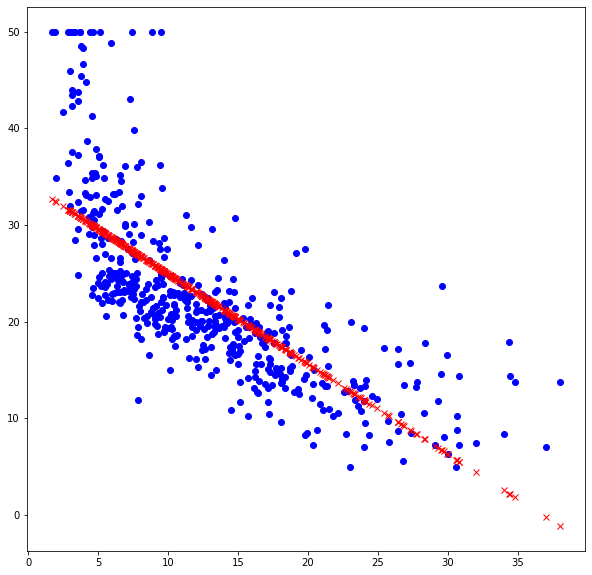

In [17]:
plt.figure(figsize=(10, 10))

plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * W_out + b_out, 'rx', label='Prediction')

plt.show()